In [ ]:
import pandas as pd
import numpy as np

#plotting libraries:
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#train-test split:
from sklearn.model_selection import train_test_split

#metrics:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as rsquare
from sklearn.model_selection import cross_val_score as CVS

#MODELS:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BigMartSales-Test.csv to BigMartSales-Test (5).csv
Saving BigMartSales-Train.csv to BigMartSales-Train (5).csv


In [ ]:
import io

Traindata=io.BytesIO(uploaded['BigMartSales-Train (5).csv'])


In [ ]:
train=pd.read_csv(Traindata)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print("\nTrain Shape", train.shape)


Test Shape (5681, 11)

Train Shape (8523, 12)


In [ ]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#find missing values:
print("Test Data")
print(test.isnull().sum().sort_values(ascending=False))
#aisa krne se badia line se aagye na null values
#let's see the percentage of missing values in each column:
print((test.isnull().sum().sort_values(ascending=False)/test.shape[0])*100)

#let's do the same thing for train data
print("Train Data")
print(train.isnull().sum().sort_values(ascending=False))
#percentage:
print((train.isnull().sum().sort_values(ascending=False)/train.shape[0])*100)


Test Data
Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
Outlet_Size                  28.269671
Item_Weight                  17.180074
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64
Train Data
Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibil

In [ ]:
#since almost 20-30 percent data is missing, we cant just drop the null values and will instead impute
#outlet size is a catagorical data type and is hence replaced by mode
train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode().values[0], inplace=True)
print(train.Outlet_Size.isnull().sum())
#same for test data also
test.Outlet_Size.fillna(train.Outlet_Size.dropna().mode().values[0], inplace=True)
print(test.Outlet_Size.isnull().sum())
#filna by default inplace kaam ni krta h buddy

0
0


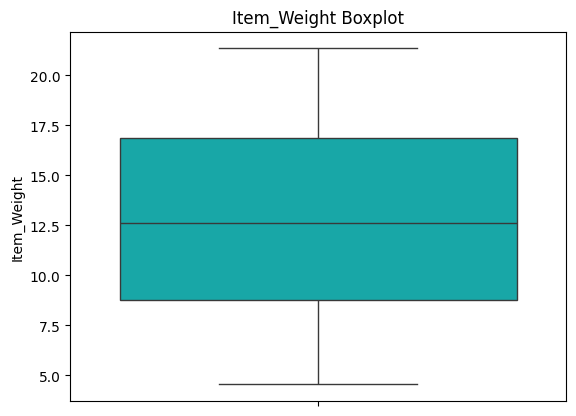

In [ ]:
#for numerical data let us see if we need mean or median:
sns.boxplot(data=train['Item_Weight'],orient='v',color='c')
plt.title("Item_Weight Boxplot")
plt.show()
#since there are no outliers present, we can fill this in weith the mean:
train.Item_Weight.fillna(train.Item_Weight.dropna().mean(), inplace=True)

In [ ]:
train.isnull().sum()
#no null values are left now:


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

DATA EXPLORATION

In [ ]:
#1 SPLIT DATA IBNTO CTAGAORICAL AND NUMERICAL FOR FURTHER PLOTTING AND VISUATION PURPOSES:
#find the columns which are catagorial and clb them in a lis and same for num,erical
numerical=train.select_dtypes('number').columns.to_list()
print(numerical)
catagorical=train.select_dtypes('object').columns.to_list()
print(catagorical)

##let us now mak3e spereat e dataframes for catagorical and numerical columns
num_train=train[numerical]
cat_train=train[catagorical]

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
#3 now let us see value counts in catagorical columns to avoid any repetitiojns and if there are any, we will replace them with the .replace() method
#yahapoe we do catagorical[1:0] kyunki jo first column hai vo toh unique identifier hi hia jok unique hi hoga
for i in catagorical[1:]:
  print(train[i].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
Ou

In [ ]:
#we see ki LF and low fat are used as two separete things when they're the exzct same thing so we will fix that:
train['Item_Fat_Content']=train.Item_Fat_Content.str.replace('LF','Low Fat')
train['Item_Fat_Content']=train.Item_Fat_Content.str.replace('low fat','Low Fat')
train['Item_Fat_Content']=train.Item_Fat_Content.str.replace('reg','Regular')
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#outlet establishmanet year is very useless-doesn't tell us anything- tpoh hum uskki jgh ek new column banyenge outlet age ka:
train['Outlet_Age']=2024-train['Outlet_Establishment_Year']

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


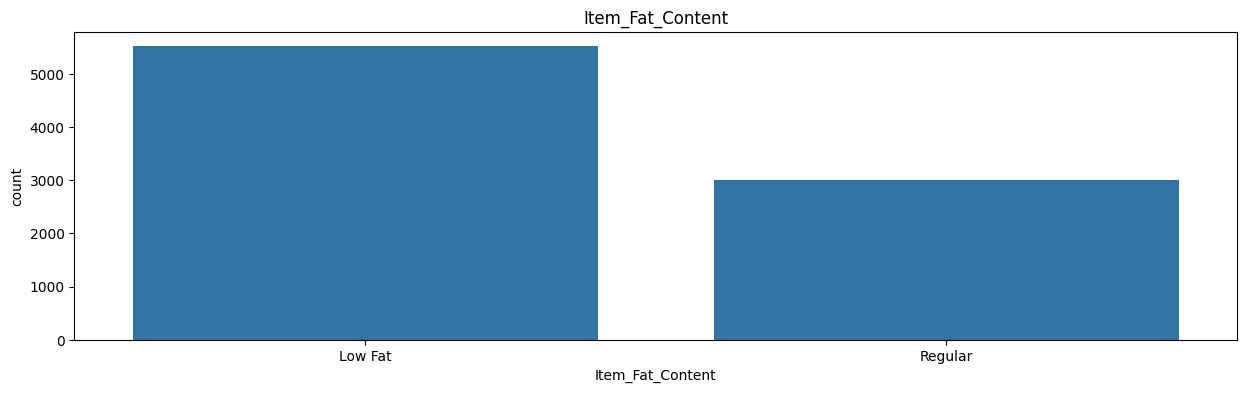

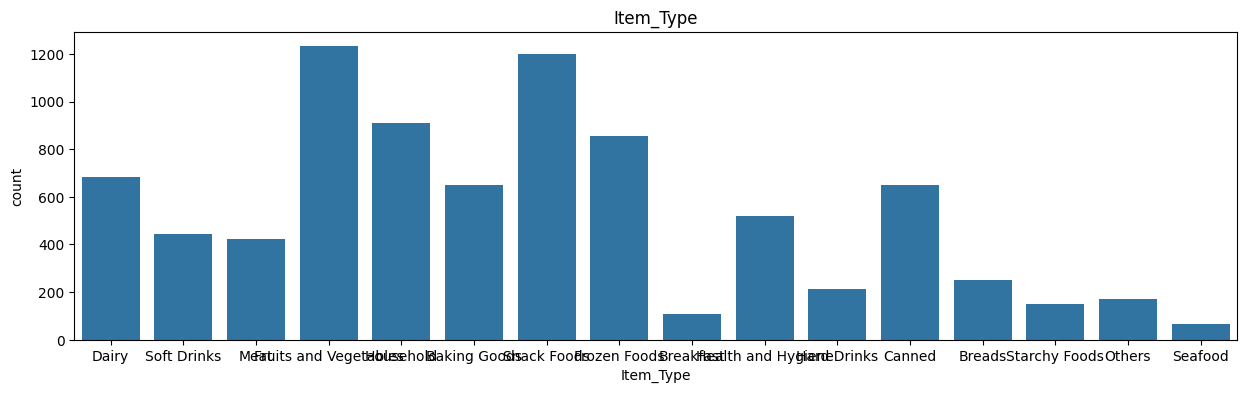

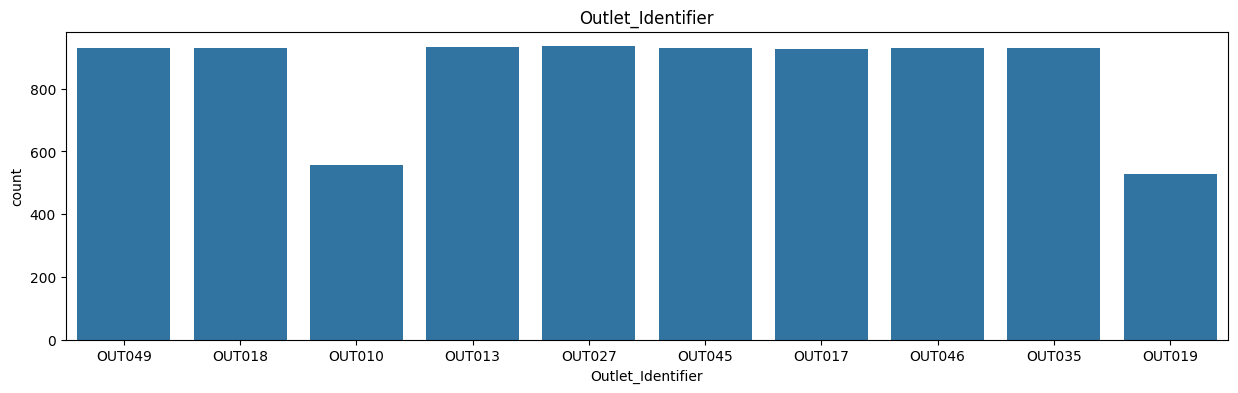

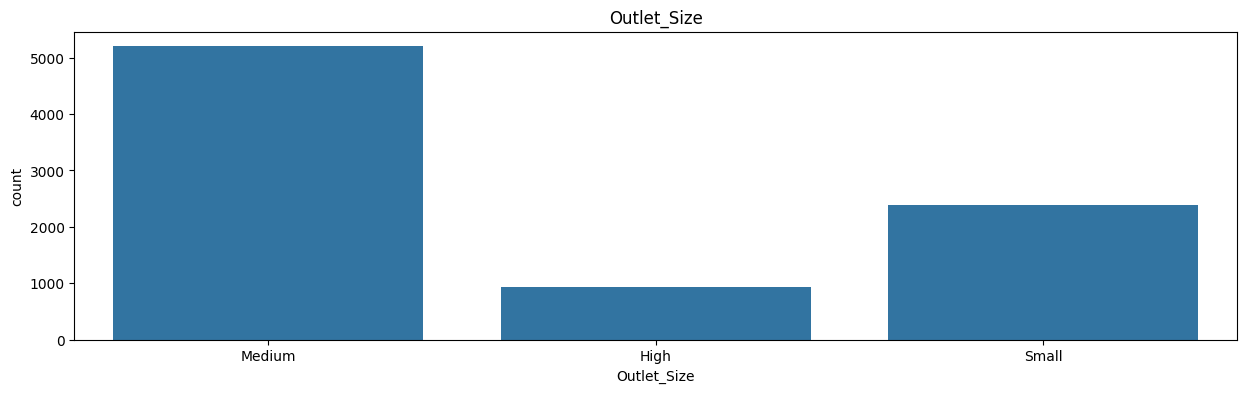

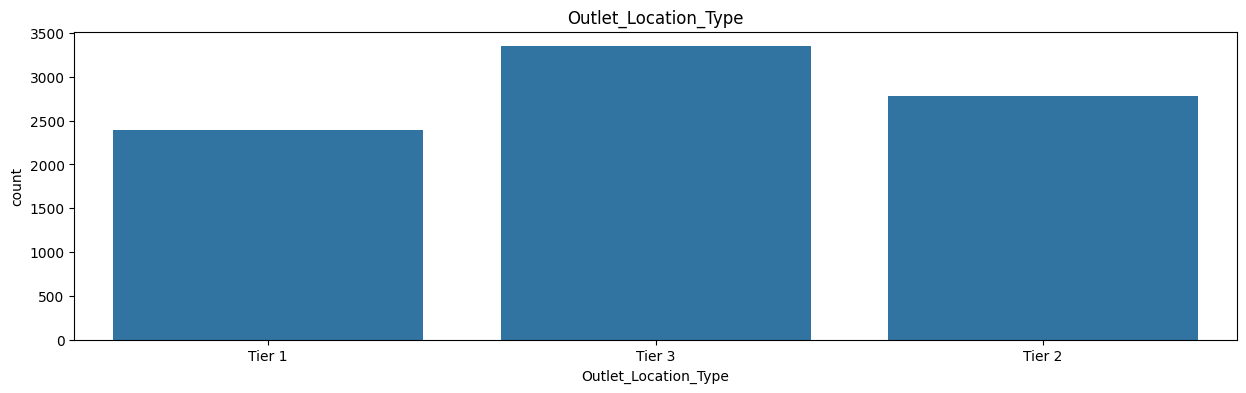

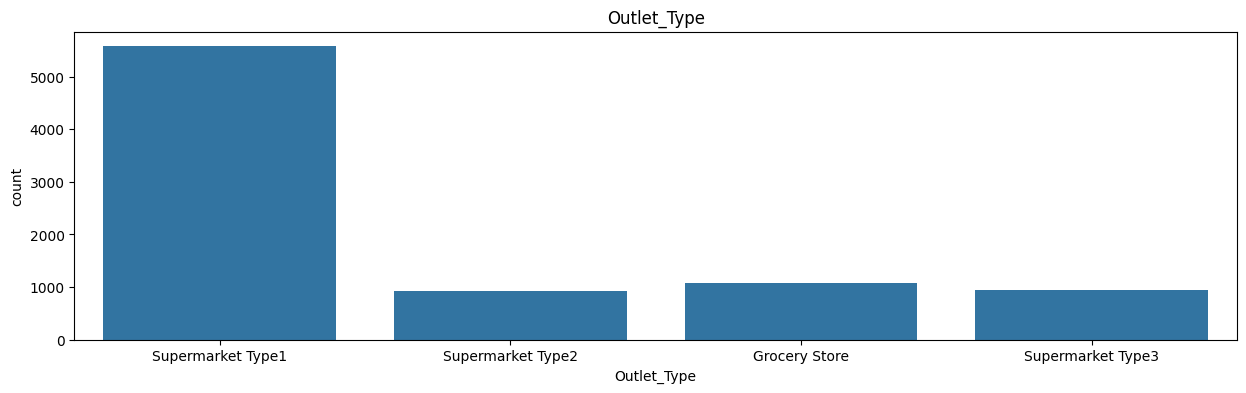

In [ ]:
#now that the numerical and catagorical columns are separetd, null values are imputed and duplicated in the catgorical columns are also delat with. let us move to dta visualisation-which is different for catagorical and numerical data
#let us strart with univariate plots:
#1) catgaorical columns- make count plots for all
for i in catagorical[1:]:
  plt.figure(figsize=(15,4))
  sns.countplot(x=train[i],data=train)
  plt.title(i)
  plt.show()

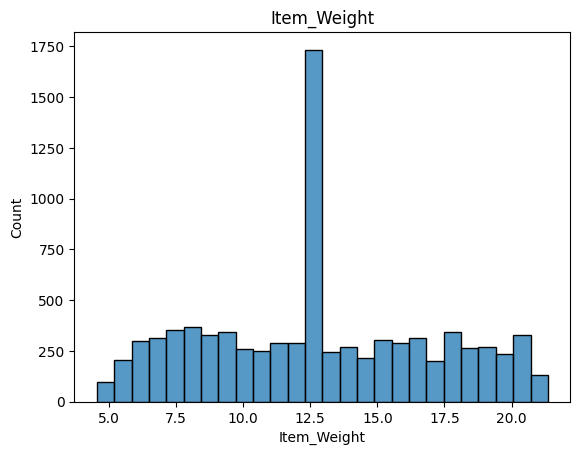

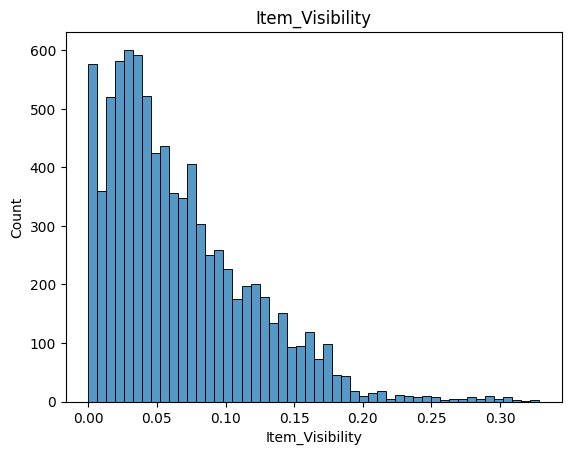

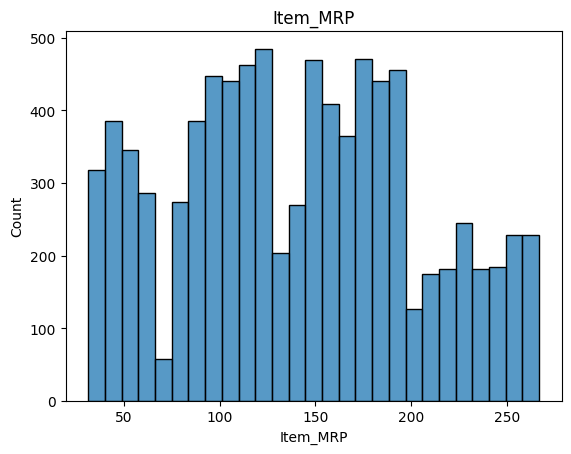

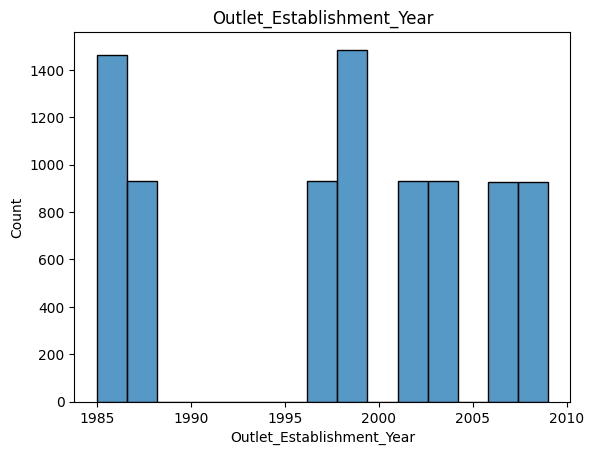

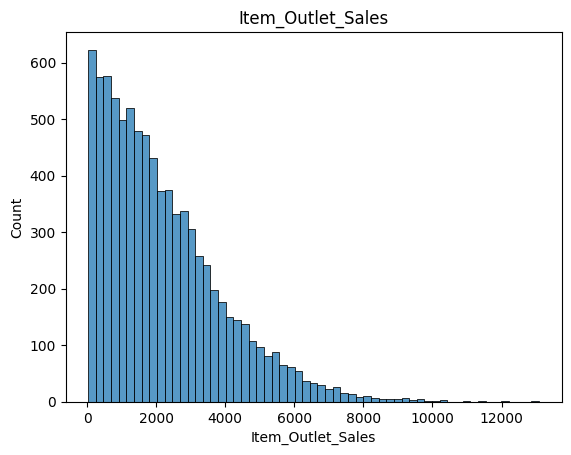

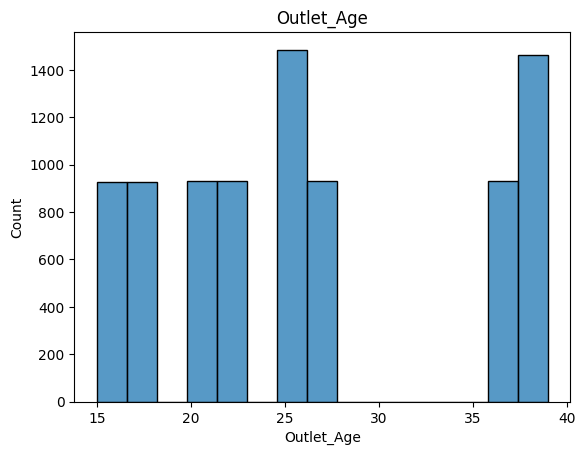

In [ ]:
##for numerical columns- we will make a histplot:
for i in numerical:
  sns.histplot(x=train[i],data=train)
  plt.title(i)
  plt.show()
sns.histplot(x=train['Outlet_Age'],data=train)
plt.title('Outlet_Age')
plt.show()

<Axes: >

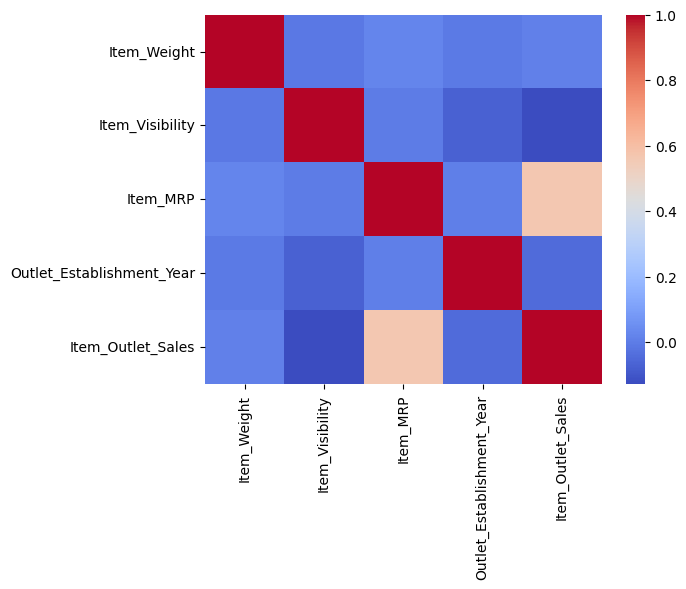

In [ ]:
##########now let us do some multivariate plotting to check the relationship of our columns with our target column:##############
#for this i am making a correlation matrix and based on thta i wll do multivariate plottng for numerical columns:
#can make heatmap only for numerical columns:
sns.heatmap(num_train.corr(),cmap='coolwarm')


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


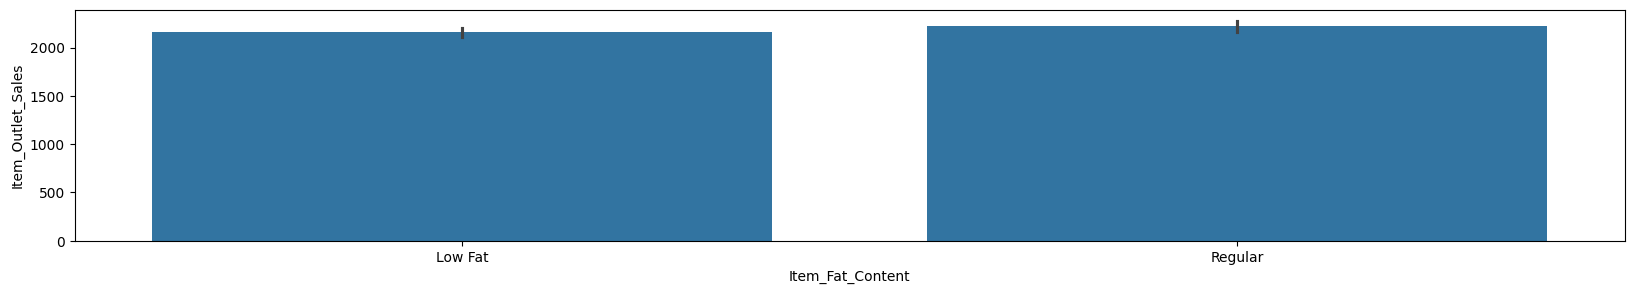

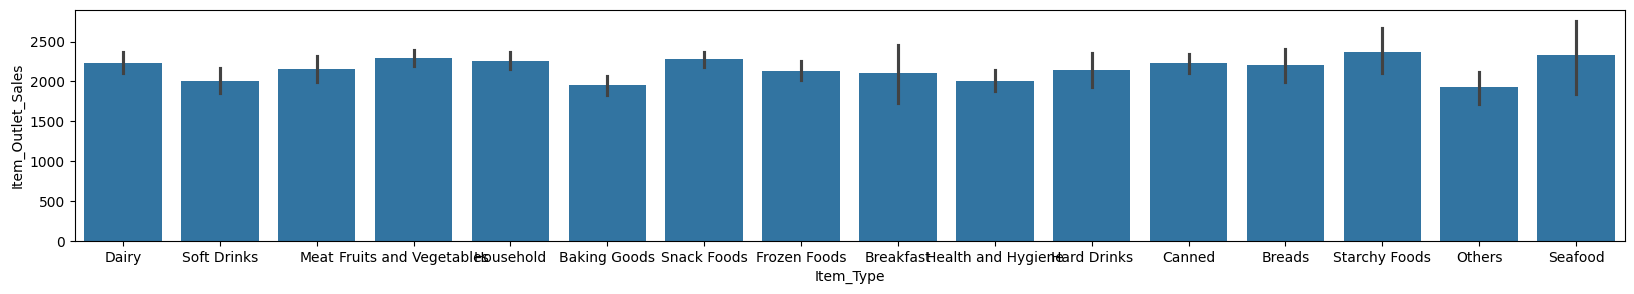

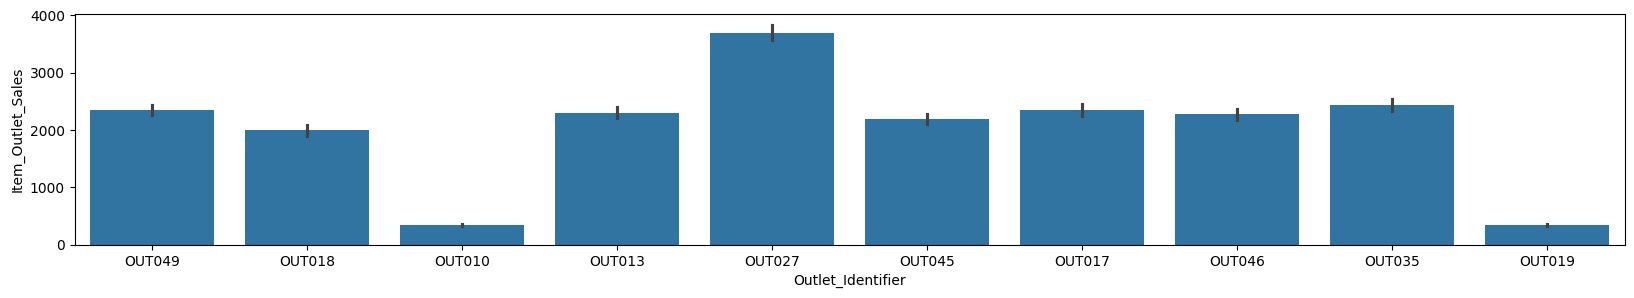

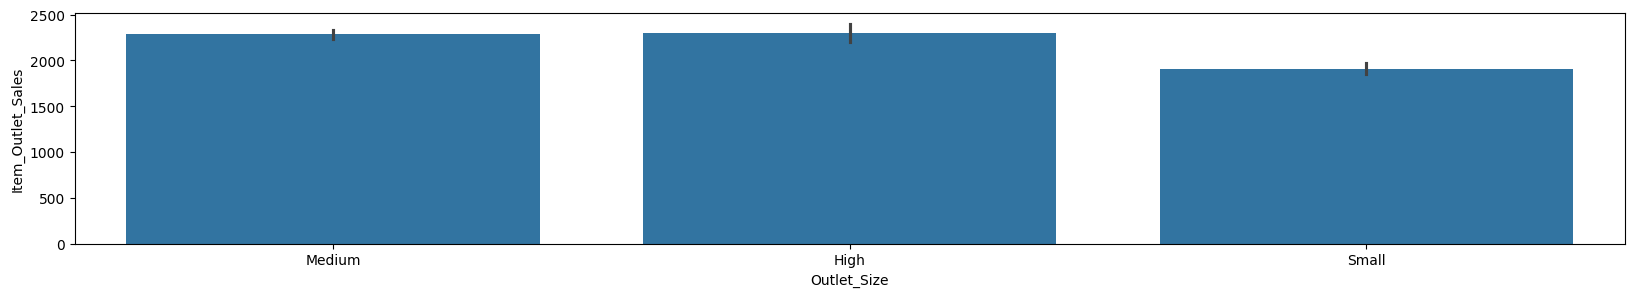

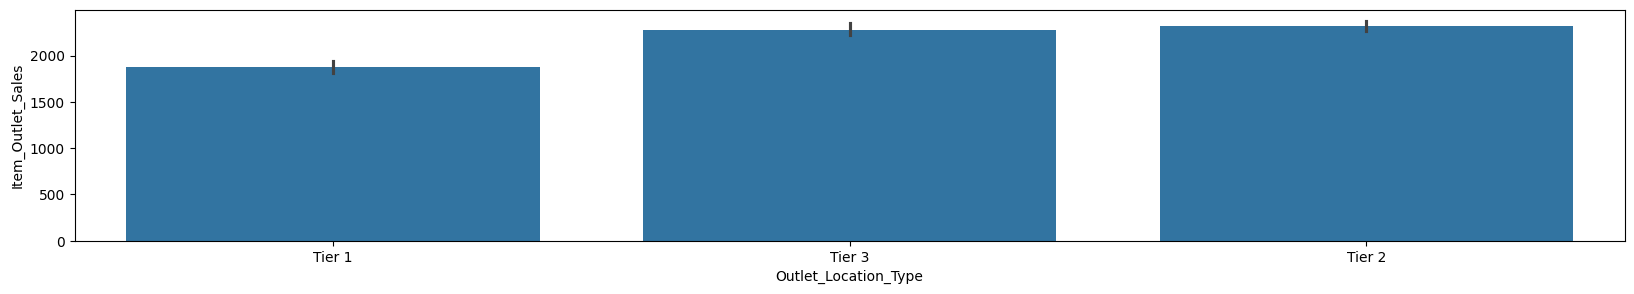

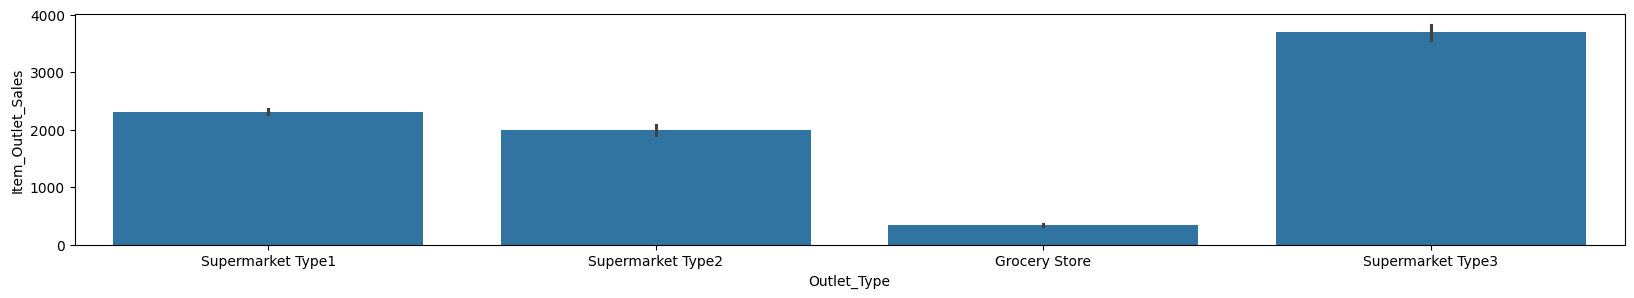

In [ ]:
#for catagoricakl multivariate plotting:
print(catagorical)
#let's just plot all:
for i in catagorical[1:]:
  plt.figure(figsize=(20,3))
  sns.barplot(x=train[i],y=train['Item_Outlet_Sales'])
  plt.show()

In [ ]:
print(catagorical)
print(numerical)
#dropping estbalishmanet year:


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [ ]:
#catagorical-catagorical k liye u can use scatterplots my friend


***Feature selection***
-outlet establishamnet year toh ab pointlesss hai now hat we have outlet age

-item_identifier ka kya rellation hai sales se uskp chill krdo

-same with outlet identifier

-encode shit now- label encoding for ordinal data which is item_fat and outlet_size and outlet_location_type

-one hot encoding is for nominal data


In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [ ]:
#for deleteing the column not needed we have to use the drop method:
train.drop('Outlet_Establishment_Year',axis=1,inplace=True)


In [ ]:
#let us make a copy of the origibnal dataframe and then do the subsequent featuire sleectiobn:
train_org=train.copy()
print(train.columns)
print(train_org.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')


In [ ]:
#removing other columns also:
train.drop('Item_Identifier',axis=1,inplace=True)
train.drop('Outlet_Identifier',axis=1, inplace=True)

In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


**One Hot Encoding:**


In [ ]:
#1) create an instance of your encoder:
encoder=OneHotEncoder()
#2)fitting the encoder to he adtaframe and transforming the catagorical variable:
encoded_data=encoder.fit_transform(train[['Item_Type']])
print(encoded_data.toarray())
feature_names=encoder.get_feature_names_out()
encoded_df=pd.DataFrame(encoded_data.toarray(), columns=feature_names)
train=pd.concat([train,encoded_df],axis=1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [ ]:
#outlet_type is also nominal so same thing will be done:
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(train[['Outlet_Type']])
features=encoder.get_feature_names_out()
encoded_df=pd.DataFrame(encoded_data.toarray(),columns=features)
train=pd.concat([train,encoded_df],axis=1)

In [ ]:
#outlet_type is also nominal so same thing will be done:
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(train[['Item_Type']])
features=encoder.get_feature_names_out()
encoded_df=pd.DataFrame(encoded_data.toarray(),columns=features)
train=pd.concat([train,encoded_df],axis=1)

In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.0,0.016047,Dairy,249.8092,1.0,0.0,Supermarket Type1,3735.1380,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.92,1.0,0.019278,Soft Drinks,48.2692,1.0,2.0,Supermarket Type2,443.4228,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0.0,0.016760,Meat,141.6180,1.0,0.0,Supermarket Type1,2097.2700,25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.20,1.0,0.000000,Fruits and Vegetables,182.0950,1.0,2.0,Grocery Store,732.3800,26,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0.0,0.000000,Household,53.8614,0.0,2.0,Supermarket Type1,994.7052,37,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#ordinal encoding:
#let us make a list of columns that need to ne ordinally encoded:
ordinallyencode=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
for i in ordinallyencode:
  encoder=OrdinalEncoder()
  train[i]=encoder.fit_transform(train[[i]])

In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.0,0.016047,249.8092,1.0,0.0,3735.1380,25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.92,1.0,0.019278,48.2692,1.0,2.0,443.4228,15,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0.0,0.016760,141.6180,1.0,0.0,2097.2700,25,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.20,1.0,0.000000,182.0950,1.0,2.0,732.3800,26,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0.0,0.000000,53.8614,0.0,2.0,994.7052,37,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##remove the faltu columns now:
cata=train.select_dtypes('object').columns.to_list()
train.drop(cata,axis =1,inplace=True)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_House

**Machine learning models:**


In [ ]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=9)
print("X_train is: ", X_train.head())
print("X_test is: ", X_test.head())
print("y_train is: ", y_train.head())
print("y_test is: ", y_test.head())

X_train is:        Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
2391       17.850               0.0         0.044463  127.1020          2.0   
1274        8.630               1.0         0.032882  113.5518          0.0   
3797       18.600               0.0         0.076856  161.0236          2.0   
4209       10.195               0.0         0.041907   43.8428          0.0   
7895       13.000               0.0         0.041995  254.7014          1.0   

      Outlet_Location_Type  Outlet_Age  Item_Type_Baking Goods  \
2391                   0.0          27                     0.0   
1274                   2.0          37                     0.0   
3797                   0.0          27                     0.0   
4209                   2.0          37                     0.0   
7895                   2.0          15                     0.0   

      Item_Type_Breads  Item_Type_Breakfast  ...  \
2391               0.0                  0.0  ...   
1274       

In [ ]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

***linear regression***

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_predict=LR.predict(X_test)
LR_MAE=round(MAE(y_test,y_predict))
LR_MSE=round(MSE(y_test,y_predict))
LR_R2=round(rsquare(y_test,y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)
##YAHAPE X HI JAAYEGA X_TRAIN YA X_TEST NI JAAAYEGA KYUNKI CV KHUDSE USKO SPLIT MAARKEKE KARLEGA APANA KAAM
print("MAE: ",LR_MAE)
print("MSE: ", LR_MSE)
print("r^2: ", LR_R2)
print("CVS: ", LR_CS)



MAE:  867
MSE:  1312408
r^2:  0.5453
CVS:  0.558


In [ ]:
#convert the predictions vs the actual values into a adatfarame:
output_dataframe=pd.DataFrame({'actual_values':y_test,'predicted_values':y_predict})
output_dataframe.to_csv('output_dataframe.csv')

***Random forest:***

In [ ]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_predict=RF.predict(X_test)
#metrics:
RF_MAE=round(MAE(y_test,y_predict))
RF_MSE=round(MSE(y_test,y_predict))
RF_R2=round(rsquare(y_test,y_predict),4)
RF_CVE=round(CVS(RF,X,y,cv=5).mean(),4)

In [ ]:
print("MAE: ",RF_MAE)
print("mse: ",RF_MSE)
print("rsquare :", RF_R2)
print("CVS: ",RF_CVE)

MAE:  812
mse:  1317019
rsquare : 0.5437
CVS:  0.5468


**LASSO** **REGRESISON**

In [ ]:
LS=Lasso()
LS.fit(X_train,y_train)
y.predict=LS.predict(X_test)
MAE_LS=round(MAE(y_test,y_predict))
MSE_LS=round(MSE(y_test,y_predict))
R2_LSE=round(rsquare(y_test,y_predict),4)
CVS_LS=round(CVS(LS,X,y,cv=5).mean(),4)


In [ ]:
print("MAE :",MAE_LS)
print("mse: ",MSE_LS)
print("r2: ", R2_LSE)
print("CVS: ",CVS_LS)


MAE : 812
mse:  1317019
r2:  0.5437
CVS:  0.5592
